# Neural Network prediction smartphone ratings

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
data=pd.read_csv('/Users/alfonsodamelio/Desktop/DATA SCIENCE/2°anno/data driven/smartphone_rating.csv')

In [4]:
data=data.drop(['Unnamed: 0'],axis=1)
data=data.drop(['model_name'],axis=1)
data=data.drop(['id'],axis=1)
data=data.drop(['smartphone_name'],axis=1)

#log
data["price"] = np.log(data["price"])
data["ram"] = np.log(data["ram"])
data["pixels_x"] = np.log(data["pixels_x"])
data["pixels_y"] = np.log(data["pixels_y"])
data["weight"] = np.log(data["weight"])
data["storage"] = np.log(data["storage"])
data["battery_mah"] = np.log(data["battery_mah"])
#data["camera_front_mp"] = np.log(data["camera_front_mp"])
#data["camera_rear_mp"] = np.log(data["camera_rear_mp"])
data["cpu_cores"] = np.log(data["cpu_cores"])
data["screen_size"] = np.log(data["screen_size"])
data["release_date"] = np.log(data["release_date"])


In [5]:
data.head()

,price,dual_sim,battery_removable,ram,pixels_x,pixels_y,sd_card,weight,storage,battery_mah,camera_front_mp,camera_rear_mp,cpu_cores,screen_size,release_date,rating
0,5.552921,0,0,0.000000,6.984716,7.560080,0,1.803359,4.158883,7.977625,1.2,8.0,0.693147,1.704748,7.608250,1.00
1,6.191851,0,0,2.079442,7.272398,7.847763,2000,1.938742,4.158883,8.294050,8.0,12.0,2.079442,1.740466,7.609821,1.00
2,5.298067,0,0,1.098612,7.272398,7.272398,128,1.932970,3.465736,8.146130,2.0,13.0,1.386294,1.504077,7.608250,0.99
3,4.976044,0,1,1.098612,7.272398,7.847763,128,1.826161,3.465736,8.077137,3.7,16.0,2.079442,1.740466,7.608250,0.99
4,4.866765,1,1,0.000000,6.291569,6.866933,64,1.386294,2.079442,7.863267,5.0,8.0,1.386294,1.609438,7.608250,0.98


In [6]:
data=pd.get_dummies(data,columns=['dual_sim','battery_removable'],dummy_na=True)

In [7]:
data.head()

,price,ram,pixels_x,pixels_y,sd_card,weight,storage,battery_mah,camera_front_mp,camera_rear_mp,cpu_cores,screen_size,release_date,rating,dual_sim_0.0,dual_sim_1.0,dual_sim_nan,battery_removable_0.0,battery_removable_1.0,battery_removable_nan
0,5.552921,0.000000,6.984716,7.560080,0,1.803359,4.158883,7.977625,1.2,8.0,0.693147,1.704748,7.608250,1.00,1,0,0,1,0,0
1,6.191851,2.079442,7.272398,7.847763,2000,1.938742,4.158883,8.294050,8.0,12.0,2.079442,1.740466,7.609821,1.00,1,0,0,1,0,0
2,5.298067,1.098612,7.272398,7.272398,128,1.932970,3.465736,8.146130,2.0,13.0,1.386294,1.504077,7.608250,0.99,1,0,0,1,0,0
3,4.976044,1.098612,7.272398,7.847763,128,1.826161,3.465736,8.077137,3.7,16.0,2.079442,1.740466,7.608250,0.99,1,0,0,0,1,0
4,4.866765,0.000000,6.291569,6.866933,64,1.386294,2.079442,7.863267,5.0,8.0,1.386294,1.609438,7.608250,0.98,0,1,0,0,1,0


**Divide $X$ and $y$**

In [8]:
X=data.drop(['rating'],axis=1).values
y=data['rating'].values

**Split in train and test**

In [9]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
#scale the X coloumns
sc_X = StandardScaler()
#for the training set we need to fit it, then scale it
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
X_train.shape

(184, 19)

In [12]:
X_test.shape

(46, 19)

In [13]:
model = Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))



model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse','mae'])

history=model.fit(X_train, y_train, epochs=400, batch_size=184,  verbose=0, validation_split=0.2,shuffle=True
        )





In [14]:
y_pred=model.predict(X_test)

In [15]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np


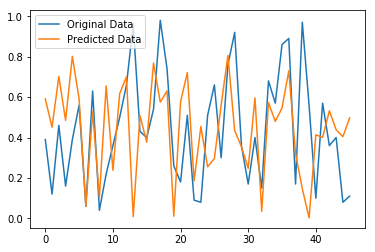

In [16]:

plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),y_pred,label="Predicted Data")
plt.legend(loc='best')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print('root mean squared error: %s'%rms)

r_2=r2_score(y_test, y_pred)
print('R-squared: %s'%r_2)

root mean squared error: 0.3092672814016094
R-squared: -0.279035026162


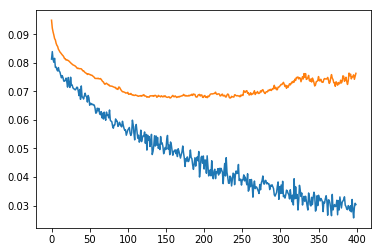

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.show()

**Ligh Gradient boosting regressor**

In [19]:
import lightgbm as lgb
from sklearn.grid_search import GridSearchCV
model2=lgb.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.03, n_estimators=30000,max_bin = 50)


model2.fit(X_train,y_train)

#predict the best model on Test
y_pred = model.predict(X_test)
#fit model with best alpha got by cross validation model


/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


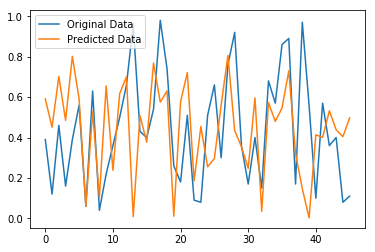

In [20]:
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),y_pred,label="Predicted Data")
plt.legend(loc='best')
plt.show()

In [21]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

0.3092672814016094
